In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('mlp_results.csv')
df

,run,architecture,epochs,train_time,train_loss,val_loss,test_loss,rmse,mae,nrmse,r,skill
0,potential,mlp,65.0,23.0,1.14,1.14,1.14,1.92,1.14,0.00943,0.99,0.97
1,x_conductivity,mlp,38.0,16.0,0.16,0.16,0.16,0.26,0.16,0.01448,0.99,0.98
2,y_conductivity,mlp,96.0,41.0,0.15,0.15,0.15,0.26,0.15,0.01334,0.99,0.98
3,xy_conductivity,mlp,NaN,NaN,NaN,NaN,NaN,2.50,1.25,0.06150,0.99,0.98
4,current,mlp,69.0,25.0,0.03,0.03,0.03,0.06,0.03,0.01101,0.91,0.83
5,potential,esn,NaN,NaN,NaN,NaN,NaN,5.10,NaN,0.04000,0.91,0.83
6,x_conductivity,esn,NaN,NaN,NaN,NaN,NaN,0.70,NaN,0.06000,0.91,0.77
7,y_conductivity,esn,NaN,NaN,NaN,NaN,NaN,0.70,NaN,0.06000,0.91,0.76
8,xy_conductivity,esn,NaN,NaN,NaN,NaN,NaN,1.70,NaN,0.05000,0.82,0.45
9,current,esn,NaN,NaN,NaN,NaN,NaN,0.10,NaN,0.03000,0.78,-0.18


/tmp/ipykernel_27643/62333423.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[4].set_xticklabels(['Potential\n[kV]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',
/tmp/ipykernel_27643/62333423.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[5].set_xticklabels(['Potential\n[kV]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',


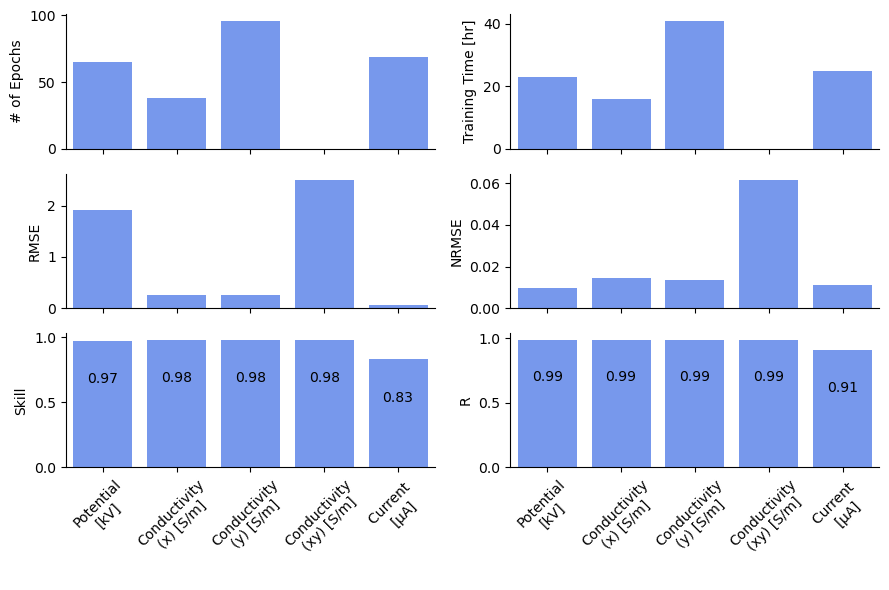

In [6]:
#plotting the results
#sns.set(style="whitegrid")
figs, axs = plt.subplots(3, 2, figsize=(9, 6), sharex=True)
#flatten the axs
axs = axs.flatten()

color = '#648FFF'
sns.barplot(x='run', y='epochs', data=df, ax=axs[0], color=color)
sns.barplot(x='run', y='train_time', data=df, ax=axs[1], color=color)
sns.barplot(x='run', y='rmse', data=df, ax=axs[2], color=color)
sns.barplot(x='run', y='nrmse', data=df, ax=axs[3], color=color)
sns.barplot(x='run', y='skill', data=df, ax=axs[4], color=color)
sns.barplot(x='run', y='r', data=df, ax=axs[5], color=color)

#set the labels
axs[0].set_ylabel('# of Epochs')
axs[1].set_ylabel('Training Time [hr]')
axs[2].set_ylabel('RMSE')
axs[3].set_ylabel('NRMSE')
axs[4].set_ylabel('Skill')
axs[5].set_ylabel('R')

# Overlaying values onto bars in axs[5]
for p in axs[4].patches:
    axs[4].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()-0.4), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for p in axs[5].patches:
    axs[5].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()-0.4), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#remove top and right spines
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#print mu 
mu = r'$\mathrm{\mu}$'
axs[4].set_xticklabels(['Potential\n[kV]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',
                        'Conductivity\n(xy) [S/m]', f'Current \n[{mu}A]'], rotation=45)
axs[4].set_xlabel(' ')
axs[5].set_xlabel(' ')
mu = r'$\mathrm{\mu}$'
axs[5].set_xticklabels(['Potential\n[kV]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',
                        'Conductivity\n(xy) [S/m]', f'Current \n[{mu}A]'], rotation=45)

plt.tight_layout()
plt.savefig('mlp_results_global.png', dpi=500)

/tmp/ipykernel_27643/1639957838.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(['Potential\n[kV]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',
/tmp/ipykernel_27643/1639957838.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[3].set_xticklabels(['Potential\n[kV]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',


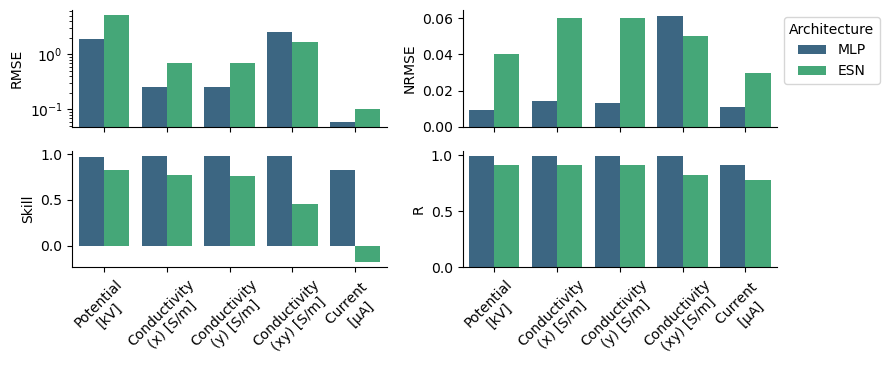

In [26]:
#plotting the results
#sns.set(style="whitegrid")
figs, axs = plt.subplots(2, 2, figsize=(9, 4), sharex=True)
#flatten the axs
axs = axs.flatten()

color = '#648FFF'
sns.barplot(x='run', y='rmse', data=df, ax=axs[0], hue='architecture', palette='viridis', legend=False)
axs[0].set_yscale('log')
sns.barplot(x='run', y='nrmse', data=df, ax=axs[1], hue='architecture', palette='viridis', legend=True)
sns.barplot(x='run', y='skill', data=df, ax=axs[2], hue='architecture',palette='viridis', legend=False)
sns.barplot(x='run', y='r', data=df, ax=axs[3], hue='architecture',palette='viridis', legend=False)

#remove legend from inside the ax[1]
axs[1].get_legend().remove()
#add legend to outside of axs[1] right hand side
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Architecture')
#change labels in legend
leg = axs[1].get_legend()
leg.set_title('Architecture')
for t, l in zip(leg.texts, ['MLP', 'ESN']):
    t.set_text(l)

#set the labels
axs[0].set_ylabel('RMSE')
axs[1].set_ylabel('NRMSE')
axs[2].set_ylabel('Skill')
axs[3].set_ylabel('R')

# Overlaying values onto bars in axs[5]
#for p in axs[2].patches:
#    axs[2].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()-0.4), 
#                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#for p in axs[3].patches:
#    axs[3].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()-0.4), 
#                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#remove top and right spines
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#print mu 
mu = r'$\mathrm{\mu}$'
axs[2].set_xticklabels(['Potential\n[kV]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',
                        'Conductivity\n(xy) [S/m]', f'Current \n[{mu}A]'], rotation=45)
axs[2].set_xlabel(' ')
axs[3].set_xlabel(' ')
mu = r'$\mathrm{\mu}$'
axs[3].set_xticklabels(['Potential\n[kV]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',
                        'Conductivity\n(xy) [S/m]', f'Current \n[{mu}A]'], rotation=45)

plt.tight_layout()
#plt.savefig('mlp_results_global.png', dpi=500)